# Class Distribution (Benign vs. Attack)

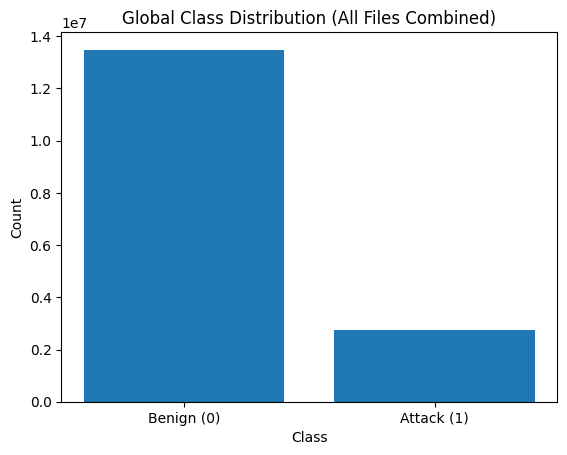

In [5]:
import pandas as pd
import pyarrow.parquet as pq
import os
from glob import glob
import matplotlib.pyplot as plt

CLEANED_DIR = r"D:\Canada\Subjects\Semester -2\AIDI-2005-02 CAPSTONE TERM ll\Bot_detector\data\cleaned"
file_list = sorted(glob(os.path.join(CLEANED_DIR, "*.parquet")))

total_counts = {0: 0, 1: 0}

for file in file_list:
    df = pq.read_table(file, columns=["Label"]).to_pandas()
    counts = df["Label"].value_counts()
    total_counts[0] += counts.get(0, 0)
    total_counts[1] += counts.get(1, 0)

plt.bar(["Benign (0)", "Attack (1)"], [total_counts[0], total_counts[1]])
plt.title("Global Class Distribution (All Files Combined)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# Feature Correlations with Attack Label 

In [12]:
import pandas as pd

# Load one full data file, not just the label column
df = pd.read_parquet("D:\Canada\Subjects\Semester -2\AIDI-2005-02 CAPSTONE TERM ll\Bot_detector\data\cleaned\Friday-02-03-2018_TrafficForML_CICFlowMeter.parquet")

print(df.shape)
print(df.columns)
print(df.head())


(1048575, 79)
Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
     

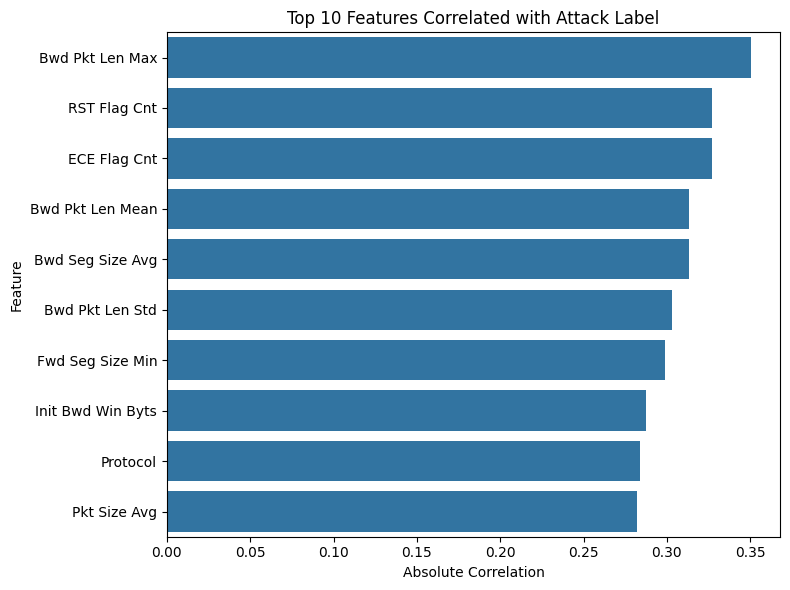

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
attack_corr = corr['Label'].drop('Label').abs().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
sns.barplot(x=attack_corr.values, y=attack_corr.index)
plt.title("Top 10 Features Correlated with Attack Label")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


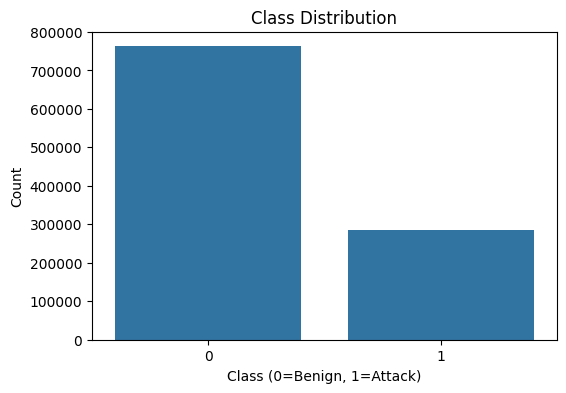

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution')
plt.xlabel('Class (0=Benign, 1=Attack)')
plt.ylabel('Count')
plt.show()


# Feature Distribution: Histogram for Key Feature

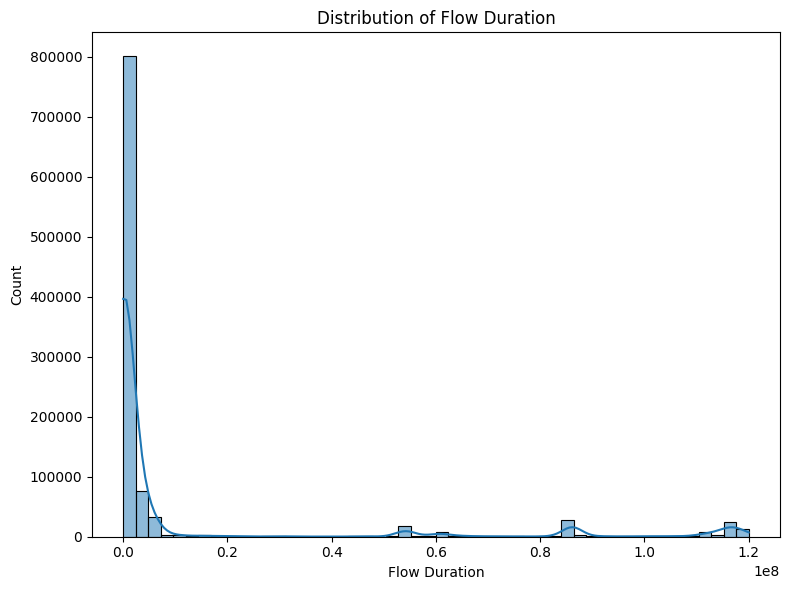

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Flow Duration'], bins=50, kde=True)
plt.title("Distribution of Flow Duration")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [20]:
# Boxplot of 'Tot Fwd Pkts' by Class

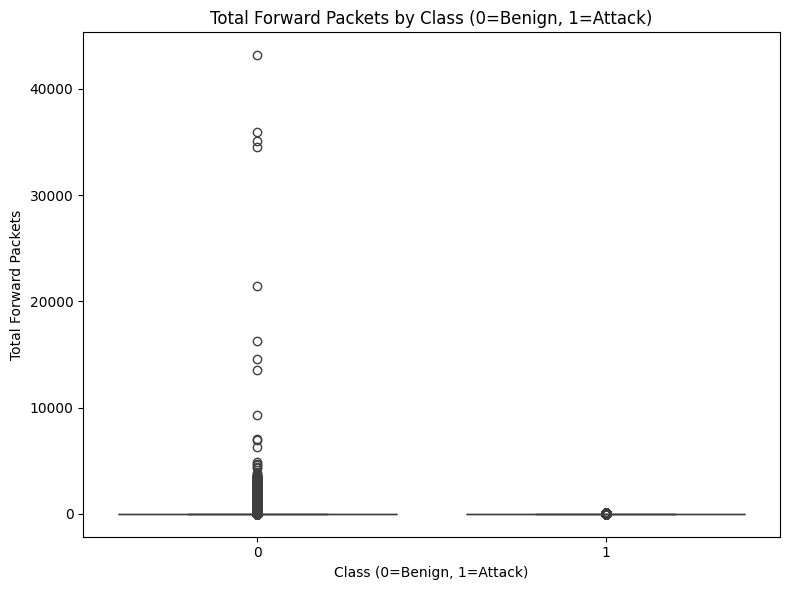

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='Tot Fwd Pkts', data=df)
plt.title("Total Forward Packets by Class (0=Benign, 1=Attack)")
plt.xlabel("Class (0=Benign, 1=Attack)")
plt.ylabel("Total Forward Packets")
plt.tight_layout()
plt.show()


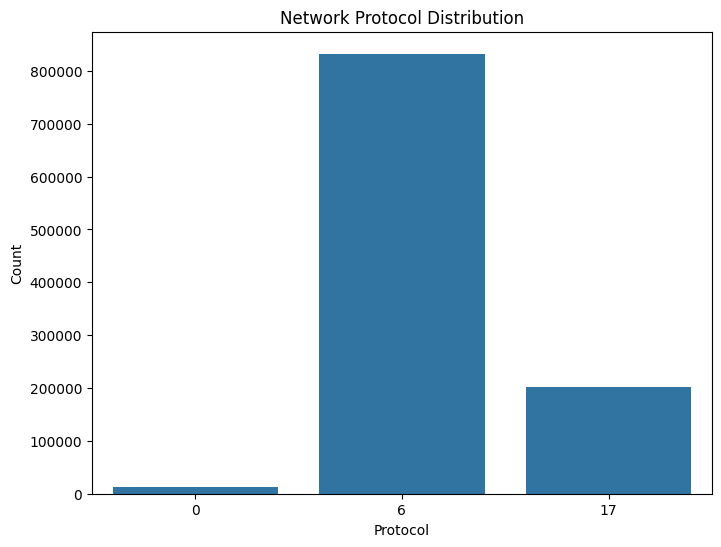

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Protocol', data=df)
plt.title("Network Protocol Distribution")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.show()
